# Experiment 4 : Grow of stables attractors fields in Circular CBN with different number of variables

This experiment explore the growth of local networks in CBN with Linear topology. Its important see what happened with the Circular CBN with more variables by local network


In [15]:
import pandas as pd

# Read the database
df = pd.read_csv("outputs/exp4_variables_circular_5_30_1000/data.csv")
df.keys()

Index(['i_sample', 'n_local_networks', 'n_var_network', 'v_topology',
       'n_output_variables', 'n_clauses_function', 'n_local_attractors',
       'n_pair_attractors', 'n_attractor_fields', 'n_time_find_attractors',
       'n_time_find_pairs', 'n_time_find_fields'],
      dtype='object')

In [16]:
# Seleccionar las columnas requeridas
df_resume = df[['n_var_network','n_local_attractors', 'n_pair_attractors', 'n_attractor_fields']]
# Describe the DataFrame to summarize statistics
df_resume_describe = df_resume.describe()
df_resume_describe

,n_var_network,n_local_attractors,n_pair_attractors,n_attractor_fields
count,6000.000000,6000.000000,6000.000000,6.000000e+03
mean,17.500000,57.915500,316.943000,6.694883e+03
std,8.539837,33.165369,397.853156,7.217123e+04
min,5.000000,15.000000,19.000000,2.000000e+00
25%,10.000000,36.000000,107.000000,1.580000e+02
50%,17.500000,50.000000,198.000000,6.460000e+02
75%,25.000000,70.000000,372.250000,2.522500e+03
max,30.000000,393.000000,8710.000000,4.963440e+06


In [17]:
# Format the values to two decimal places
stats_formatted = df_resume_describe.applymap(lambda x: f"{x:.2f}")

# Export the descriptive statistics to a LaTeX table
latex_text = stats_formatted.to_latex(
    index=True,       # Include the index
    bold_rows=True,   # Make the index bold
    column_format='lccc',  # Column format (l: left, c: center, r: right)
    header=True,      # Include column headers
    caption='Descriptive Statistics of the Data',  # Add a caption
    label='tab:descriptive_stats'  # Add a label
)

# Escape the '%' character in the LaTeX string
latex_text_escaped = latex_text.replace('%', r'\%')
print(latex_text_escaped)

\begin{table}
\caption{Descriptive Statistics of the Data}
\label{tab:descriptive_stats}
\begin{tabular}{lccc}
\toprule
 & n_var_network & n_local_attractors & n_pair_attractors & n_attractor_fields \\
\midrule
\textbf{count} & 6000.00 & 6000.00 & 6000.00 & 6000.00 \\
\textbf{mean} & 17.50 & 57.92 & 316.94 & 6694.88 \\
\textbf{std} & 8.54 & 33.17 & 397.85 & 72171.23 \\
\textbf{min} & 5.00 & 15.00 & 19.00 & 2.00 \\
\textbf{25\%} & 10.00 & 36.00 & 107.00 & 158.00 \\
\textbf{50\%} & 17.50 & 50.00 & 198.00 & 646.00 \\
\textbf{75\%} & 25.00 & 70.00 & 372.25 & 2522.50 \\
\textbf{max} & 30.00 & 393.00 & 8710.00 & 4963440.00 \\
\bottomrule
\end{tabular}
\end{table}



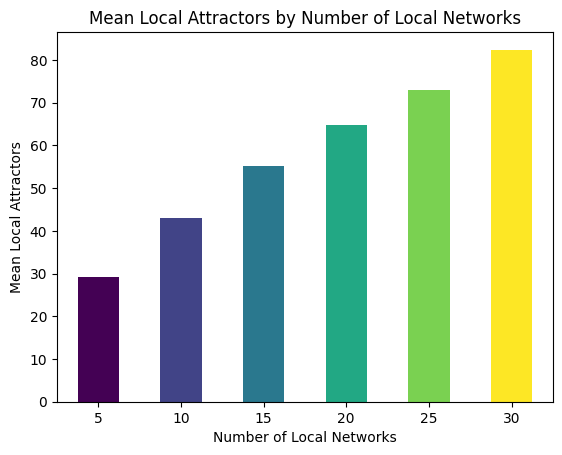

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Group by 'n_var_network' and calculate the mean of 'n_local_attractors'
grouped_data = df.groupby('n_var_network')['n_local_attractors'].mean()

# Determine number of unique groups
num_groups = len(grouped_data)

# Choose a colormap (recommended way)
cmap = matplotlib.colormaps['viridis']  # Access colormap by name

# Create colors array from the colormap
colors = cmap(np.linspace(0, 1, num_groups))

# Create the bar plot with different colors for each bar
grouped_data.plot(kind='bar', color=colors)

# Customize the plot
plt.title('Mean Local Attractors by Number of Local Networks')
plt.xlabel('Number of Local Networks')
plt.ylabel('Mean Local Attractors')
plt.xticks(rotation=0)

# Show the plot
plt.show()

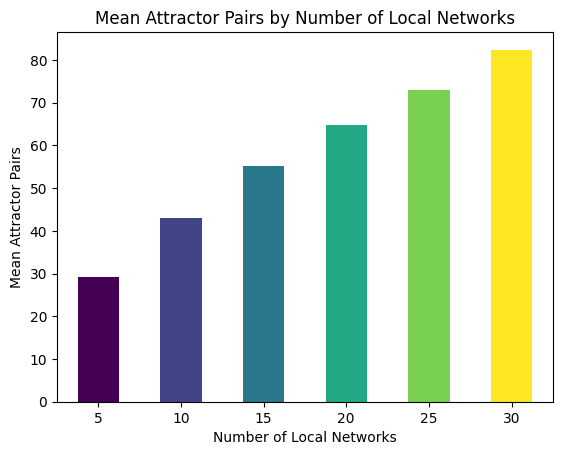

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Group by 'n_var_network' and calculate the mean of 'n_local_attractors'
grouped_data = df.groupby('n_var_network')['n_local_attractors'].mean()

# Determine number of unique groups
num_groups = len(grouped_data)

# Choose a colormap (recommended way)
cmap = matplotlib.colormaps['viridis']  # Access colormap by name

# Create colors array from the colormap
colors = cmap(np.linspace(0, 1, num_groups))

# Create the bar plot with different colors for each bar
grouped_data.plot(kind='bar', color=colors)

# Customize the plot
plt.title('Mean Attractor Pairs by Number of Local Networks')
plt.xlabel('Number of Local Networks')
plt.ylabel('Mean Attractor Pairs')
plt.xticks(rotation=0)

# Show the plot
plt.show()

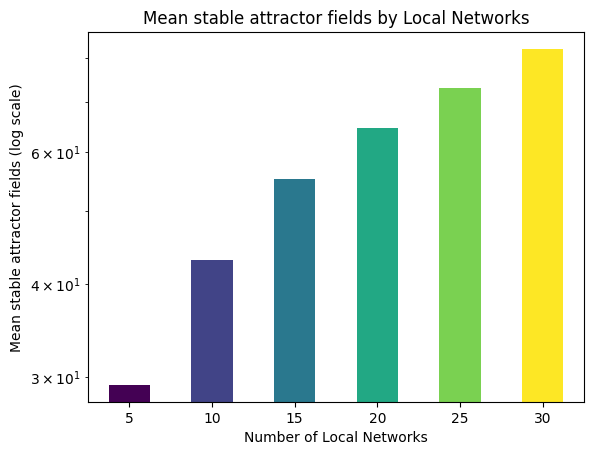

In [20]:
plt.show()
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Group by 'n_var_network' and calculate the mean of 'n_local_attractors'
grouped_data = df.groupby('n_var_network')['n_local_attractors'].mean()

# Determine number of unique groups (optional)
num_groups = len(grouped_data)

# Choose a colormap
cmap = matplotlib.colormaps['viridis']  # Access colormap by name

# Create colors array from the colormap (optional, for color variation)
# You can remove these lines if you don't want color variation
colors = cmap(np.linspace(0, 1, num_groups))

# Create the bar plot with logarithmic scale on the y-axis
grouped_data.plot(kind='bar', logy=True, color=colors)  # Use colors if desired

# Customize the plot
plt.title('Mean stable attractor fields by Local Networks')
plt.xlabel('Number of Local Networks')
plt.ylabel('Mean stable attractor fields (log scale)')
plt.xticks(rotation=0)

# Show the plot
plt.show()

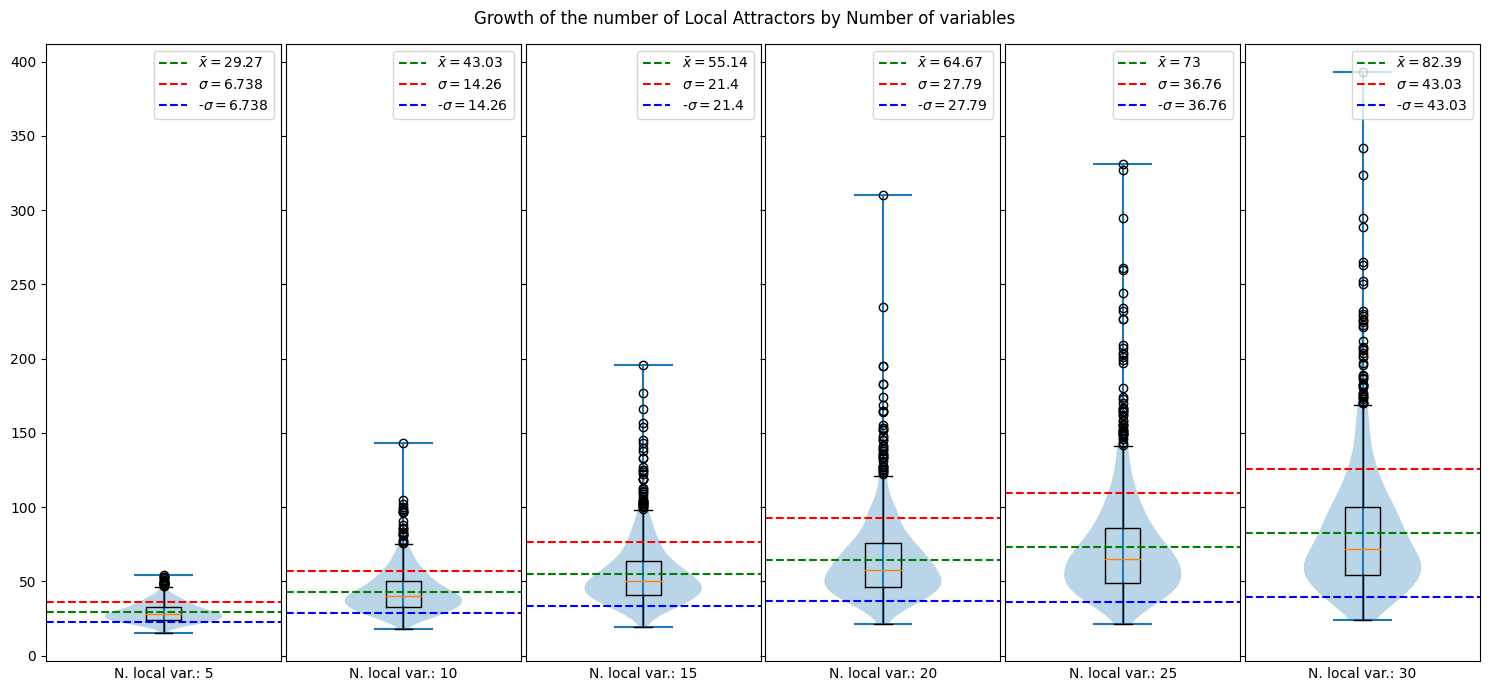

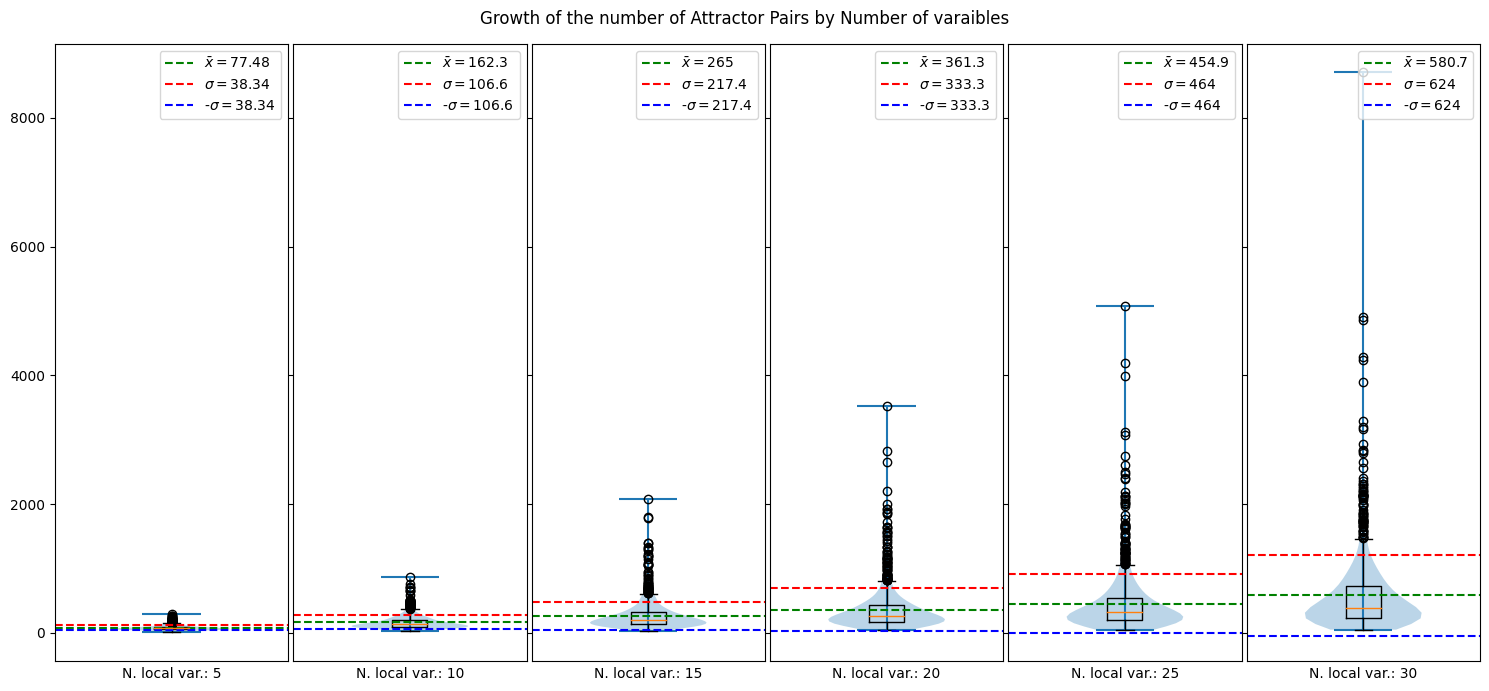

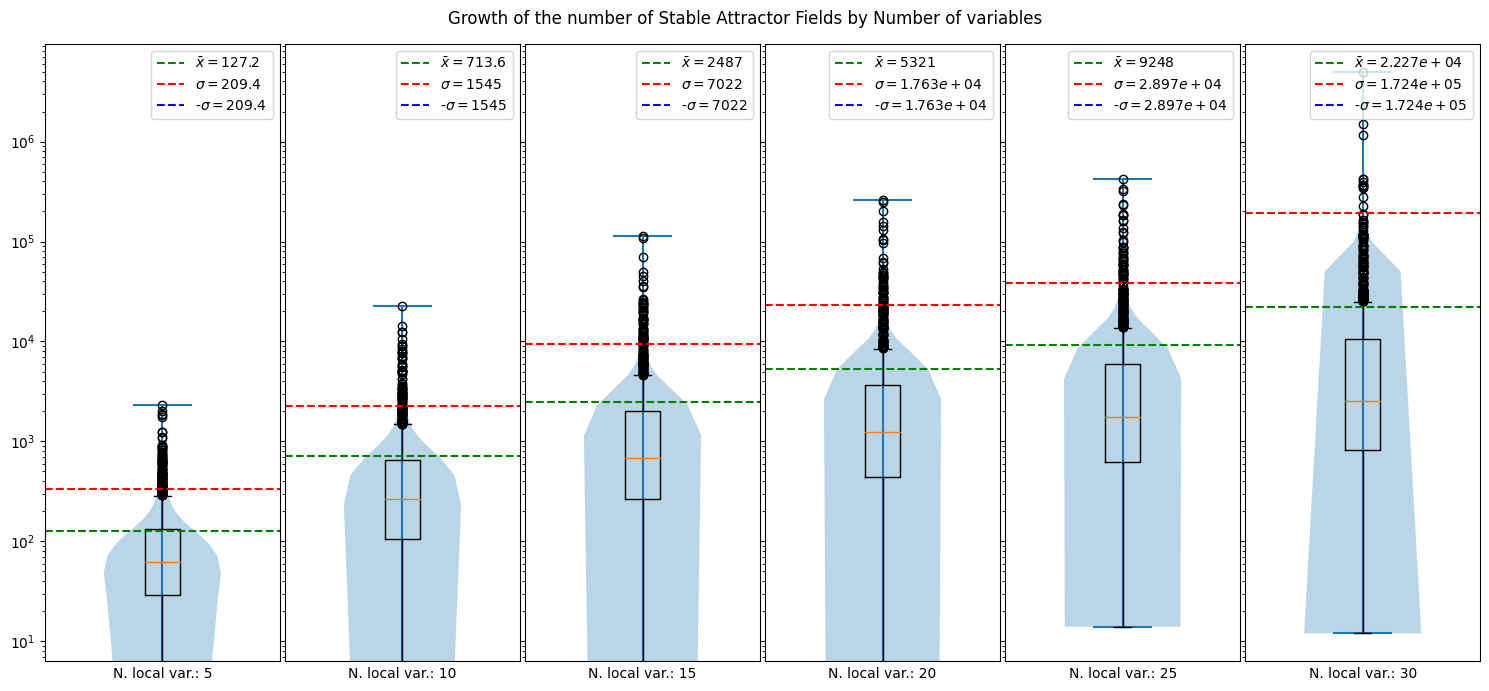

In [21]:
# Obtain the last three unique values of n_local_networks
n_var_networks_unique = df_resume['n_var_network'].unique()
# n_local_networks_last_three = sorted(n_local_networks_unique)[-3:]
n_var_networks_last_three = sorted(n_var_networks_unique)

# Violin graphs
attributes = ['n_local_attractors', 'n_pair_attractors', 'n_attractor_fields']
attribute_labels = ['Growth of the number of Local Attractors by Number of variables',
                    'Growth of the number of Attractor Pairs by Number of varaibles',
                    'Growth of the number of Stable Attractor Fields by Number of variables']

for attribute, attribute_label in zip(attributes, attribute_labels):
    fig, axs = plt.subplots(1, len(n_var_networks_last_three), sharey=True, figsize=(15, 7))

    for i, n_var_network in enumerate(n_var_networks_last_three):
        data = df_resume[df_resume['n_var_network'] == n_var_network][attribute]

        axs[i].violinplot(data)
        axs[i].boxplot(data)
        axs[i].set_xlabel(f'N. local var.: {n_var_network}')
        axs[i].set_xticks([])
        axs[i].set_xlim((0.5, 1.5))

        mean = data.mean()
        std_dev = data.std()
        axs[i].axhline(mean, color='g', ls='--', label=fr'$\bar{{x}}={mean:.4g}$')
        axs[i].axhline(mean + std_dev, color='r', ls='--', label=fr'$\sigma={std_dev:.4g}$')
        axs[i].axhline(mean - std_dev, color='b', ls='--', label=fr'-$\sigma={std_dev:.4g}$')
        axs[i].legend()

        if attribute == 'n_attractor_fields':  # Apply log scale only on the last attribute
            axs[i].set_yscale('log')

    fig.suptitle(f'{attribute_label}')
    fig.tight_layout(w_pad=0)

plt.show()

### Incremental Taxs

In [22]:
# Sort the DataFrame by 'i_sample' and 'n_local_networks'
df_sorted = df.sort_values(['i_sample', 'n_var_network'])

# Calculate the difference in 'n_attractor_fields' for each pair of consecutive values of 'n_local_networks' for a same 'i_sample'
df_sorted['diff_n_attractor_fields'] = df_sorted.groupby(['i_sample'])['n_attractor_fields'].diff()

# Remove rows containing NaN (corresponding to the first value of 'n_local_networks' for each 'i_sample')
df_sorted = df_sorted.dropna(subset=['diff_n_attractor_fields'])

# Calculate the average of the differences per 'i_sample'
average_diff_by_i_sample = df_sorted.groupby('i_sample')['diff_n_attractor_fields'].mean()

# Display the summary statistics of the average differences per 'i_sample'
average_diff_by_i_sample.describe()

count      1000.000000
mean       4429.144600
std       34484.344241
min        -311.200000
25%         139.550000
50%         485.500000
75%        2091.200000
max      992679.000000
Name: diff_n_attractor_fields, dtype: float64

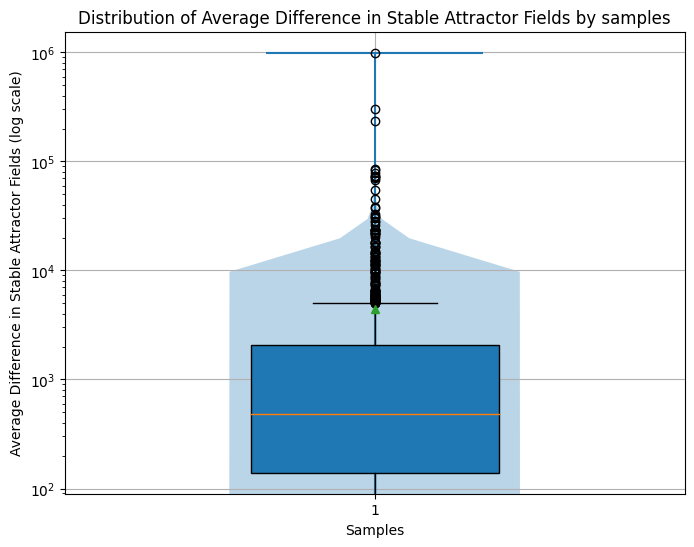

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Violin plot
plt.violinplot(average_diff_by_i_sample.values, vert=True, widths=0.7)

# Boxplot
plt.boxplot(average_diff_by_i_sample.values, vert=True, widths=0.4, patch_artist=True, showmeans=True)

# Log scale for y-axis
plt.yscale('log')

# Customize plot
plt.title('Distribution of Average Difference in Stable Attractor Fields by samples')
plt.xlabel('Samples')
plt.ylabel('Average Difference in Stable Attractor Fields (log scale)')
plt.grid(True)

# Show plot
plt.show()

### Top 20

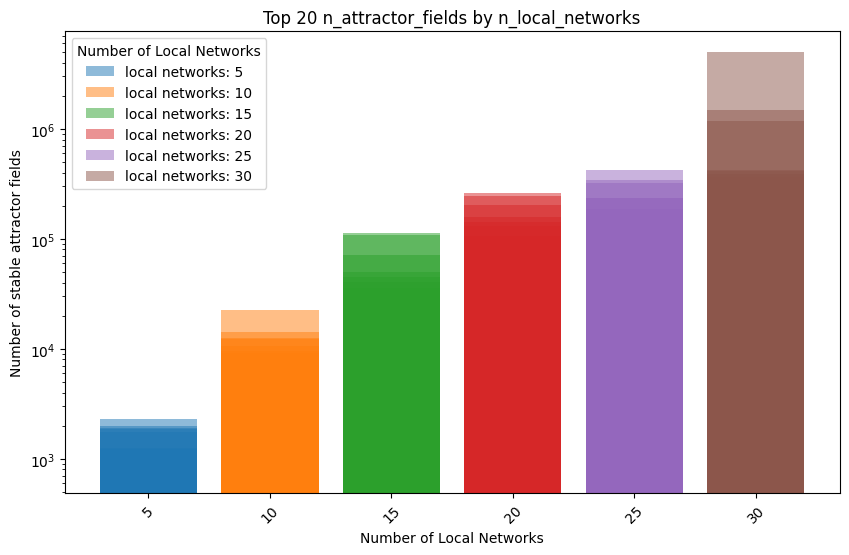

In [24]:
# Group by 'n_local_networks' and find the top 20 values of 'n_attractor_fields' for each group
top_20_by_n_local_network = df.groupby('n_var_network')['n_attractor_fields'].nlargest(20)

# Create the stacked bar chart
plt.figure(figsize=(10, 6))

# Iterate over each group and draw the bars only for the top 20 values
for network, values in top_20_by_n_local_network.groupby(level=0):
    plt.bar([f'{network}'] * len(values), values.values, label=f'local networks: {network}', alpha=0.5)

# Customize the plot
plt.title('Top 20 n_attractor_fields by n_local_networks')
plt.xlabel('Number of Local Networks')
plt.ylabel('Number of stable attractor fields')
plt.xticks(rotation=45)
plt.yscale('log')  # Apply log scale on the y-axis
plt.legend(title='Number of Local Networks')

# Show the plot
plt.show()

### Dispersion Graph

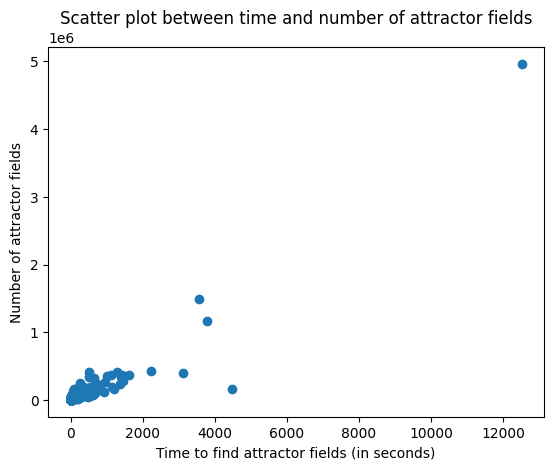

In [25]:
# Create a scatter plot
plt.scatter(df['n_time_find_fields'], df['n_attractor_fields'])
plt.xlabel('Time to find attractor fields (in seconds)')
plt.ylabel('Number of attractor fields')
plt.title('Scatter plot between time and number of attractor fields')
plt.show()

### Power-Law Distribution

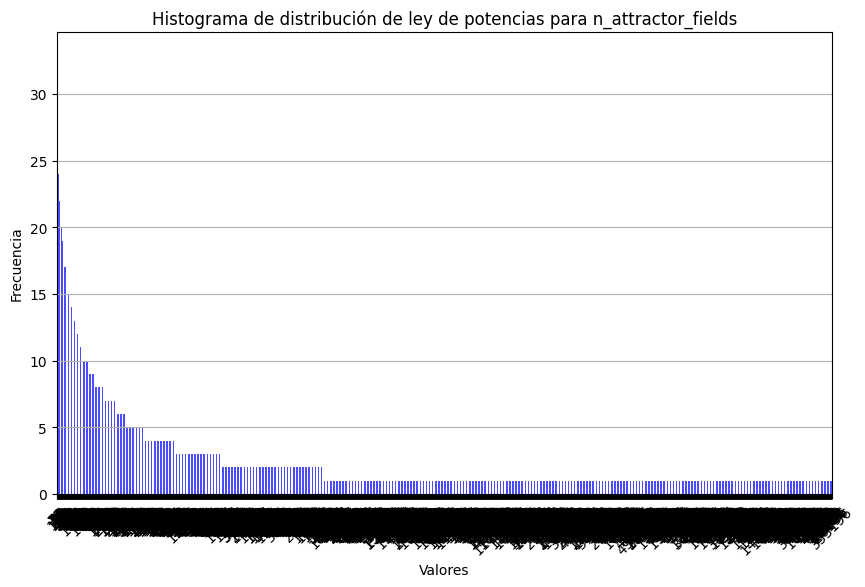

In [26]:
# Calcular el histograma de frecuencias
histogram = df['n_attractor_fields'].value_counts()

# Graficar el histograma
plt.figure(figsize=(10, 6))
histogram.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Histograma de distribución de ley de potencias para n_attractor_fields')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

## Specific Statistics

In [32]:
# Filtrar el DataFrame por 'n_local_networks' igual a 10
df_filtered = df[df['n_var_network'] == 30]

# Seleccionar las columnas requeridas
df_filtered_resume = df_filtered[['n_local_attractors', 'n_pair_attractors', 'n_attractor_fields']]

# Describe the DataFrame to summarize statistics
df_filtered_resume = df_filtered_resume.describe()
df_filtered_resume

,n_local_attractors,n_pair_attractors,n_attractor_fields
count,1000.000000,1000.000000,1.000000e+03
mean,82.391000,580.676000,2.227287e+04
std,43.027194,623.981395,1.724182e+05
min,24.000000,49.000000,1.200000e+01
25%,54.000000,225.750000,8.145000e+02
50%,72.000000,391.500000,2.521000e+03
75%,100.000000,726.000000,1.055200e+04
max,393.000000,8710.000000,4.963440e+06


In [33]:
# Format the values to two decimal places
stats_formatted = df_filtered_resume.applymap(lambda x: f"{x:.2f}")

# Export the descriptive statistics to a LaTeX table
latex_text = stats_formatted.to_latex(
    index=True,             # Include the index
    bold_rows=True,         # Make the index bold
    column_format='lccc',   # Column format (l: left, c: center, r: right)
    header=True,            # Include column headers
    caption='Descriptive Statistics of the Data',  # Add a caption
    label='tab:descriptive_stats'  # Add a label
)

# Escape the '%' character in the LaTeX string
latex_text_escaped = latex_text.replace('%', r'\%')
print(latex_text_escaped)

\begin{table}
\caption{Descriptive Statistics of the Data}
\label{tab:descriptive_stats}
\begin{tabular}{lccc}
\toprule
 & n_local_attractors & n_pair_attractors & n_attractor_fields \\
\midrule
\textbf{count} & 1000.00 & 1000.00 & 1000.00 \\
\textbf{mean} & 82.39 & 580.68 & 22272.87 \\
\textbf{std} & 43.03 & 623.98 & 172418.23 \\
\textbf{min} & 24.00 & 49.00 & 12.00 \\
\textbf{25\%} & 54.00 & 225.75 & 814.50 \\
\textbf{50\%} & 72.00 & 391.50 & 2521.00 \\
\textbf{75\%} & 100.00 & 726.00 & 10552.00 \\
\textbf{max} & 393.00 & 8710.00 & 4963440.00 \\
\bottomrule
\end{tabular}
\end{table}

